In [107]:
import pandas as pd
import matplotlib.pyplot as mltp
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk
import sklearn as sk
import seaborn as sea
import re 
from tqdm import tqdm
from tqdm.notebook import tqdm
tqdm.pandas()



In [2]:
def stripping(liste):
    return [i.strip() for i in liste]

In [3]:
df=pd.read_csv('data/train_500.csv',converters={'sent_tokenize': lambda x: x[1:-1].strip('][').replace("'","").strip().split(','),
'word_tokenize': lambda x: x[1:-1].strip('][').replace("'","").strip().split(','),
'word_tokenize_without_stopwords': lambda x: x[1:-1].strip('][').replace("'","").strip().split(',')
,'word_tokenize_without_stopwords_port': lambda x: x[1:-1].strip('][').replace("'","").strip().split(',')
,'msg_lemmatized': lambda x: x[1:-1].strip('][').replace("'","").strip().split(',')
})

df['word_tokenize']=df['word_tokenize'].progress_apply(stripping)
df['sent_tokenize']=df['sent_tokenize'].progress_apply(stripping)
df['word_tokenize_without_stopwords']=df['word_tokenize_without_stopwords'].progress_apply(stripping)
df['word_tokenize_without_stopwords_port']=df['word_tokenize_without_stopwords_port'].progress_apply(stripping)
df['word_tokenize_without_stopwords_port']=df['word_tokenize_without_stopwords_port'].progress_apply(stripping)

  0%|          | 0/19500 [00:00<?, ?it/s]

  0%|          | 0/19500 [00:00<?, ?it/s]

  0%|          | 0/19500 [00:00<?, ?it/s]

  0%|          | 0/19500 [00:00<?, ?it/s]

  0%|          | 0/19500 [00:00<?, ?it/s]

In [4]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df=df.reset_index(drop=True)

In [5]:
df.columns

Index(['id', 'date', 'text', 'lang', 'language_2', 'word_tokenize',
       'sent_tokenize', 'count_word', 'count_sent',
       'word_tokenize_num_of_stopwords', 'word_tokenize_without_stopwords',
       'word_tokenize_without_stopwords_port', 'msg_lemmatized', 'cleanLinks',
       'laenge_saetze', 'word_per_sent_mean', 'gender', 'age', 'topic',
       'sign'],
      dtype='object')

In [6]:
print(f'Rows in the df: {len(df.index)}')

Rows in the df: 19500


In [80]:
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word)
        
         for word in text if word ]
    return lemm_text
df['msg_lemmatized_port']=df['word_tokenize_without_stopwords_port'].apply(lambda x:lemmatizer(x))

- lgrams 
- ngrams 
- sehen wie oft wörter vorkommen 
- sehen welche tokens überall vorkommen in mehreren oder nur in einem drin sind 
- sehen welche dokumente zugeordnet ist und wie  die verteilung ist der uhrsprünglichen topics 
- tendenzen herrausfinden 
- labeling nicht so gut oder topic modelling 
- zu viel topics oder stopwords 
- frequenzen finden -_> idf --> weiviele wörter in den dokumenten vorkommen 
- statistiken der wörter --> basierend auf ngrams 
- edge case nicht beschneiden --> schwellwerte --> explorativ 
- 

In [81]:
df.head()

,id,date,text,lang,language_2,word_tokenize,sent_tokenize,count_word,count_sent,word_tokenize_num_of_stopwords,...,msg_lemmatized,cleanLinks,laenge_saetze,word_per_sent_mean,gender,age,topic,sign,msg_lemmatized_without_point,msg_lemmatized_port
0,2970791,"25,May,2004",This blog is being posted due to the fact that...,en,en,"[This, blog, is, being, posted, due, to, the, ...",[This blog is being posted due to the fact tha...,83,4,34,...,"[This, blog, posted, due, fact, little, develo...",This blog is being posted due to the fact that...,4,20.75,male,14,Student,Sagittarius,"[This, blog, posted, due, fact, little, develo...","[thi, blog, post, due, fact, littl, develop, h..."
1,3931851,"02,agosto,2004",So I have a big fucking interview tomorrow for...,en,en,"[So, I, have, a, big, fucking, interview, tomo...",[So I have a big fucking interview tomorrow fo...,88,5,31,...,"[So, I, big, fucking, interview, tomorrow, new...",So I have a big fucking interview tomorrow for...,5,17.60,male,15,Student,Pisces,"[This, blog, posted, due, fact, little, develo...","[so, i, big, fuck, interview, tomorrow, new, s..."
2,3481650,"07,July,2004",I was reminded just now of the time Ashley and...,en,en,"[I, was, reminded, just, now, of, the, time, A...",[I was reminded just now of the time Ashley an...,574,32,234,...,"[I, reminded, time, Ashley, I, drove, Kemah, w...",I was reminded just now of the time Ashley and...,32,17.94,female,17,Student,Gemini,"[This, blog, posted, due, fact, little, develo...","[i, remind, time, ashley, i, drove, kemah, win..."
3,4187211,"20,August,2004",I was checking up on my cousin Dylan and Fanni...,en,en,"[I, was, checking, up, on, my, cousin, Dylan, ...","[""I was checking up on my cousin Dylan and Fan...",84,3,32,...,"[I, checking, cousin, Dylan, Fannie, ""s"", wedd...",I was checking up on my cousin Dylan and Fanni...,3,28.00,female,23,Student,Taurus,"[This, blog, posted, due, fact, little, develo...","[i, check, cousin, dylan, fanni, ""s"", wed, sit..."
4,3686696,"24,June,2004",for the NME interview click urlLink part 1 and...,en,en,"[for, the, NME, interview, click, urlLink, par...",[for the NME interview click urlLink part 1 an...,12,1,3,...,"[NME, interview, click, urlLink, part, 1, urlL...",for the NME interview click urlLink part 1 and...,1,12.00,female,23,Student,Aquarius,"[This, blog, posted, due, fact, little, develo...","[nme, interview, click, urllink, part, 1, urll..."


In [22]:
from wordcloud import WordCloud

In [82]:
element=[',','.','!','"',')','(']

x = [word  for word in  df['msg_lemmatized_port'][0] if word not in element]
x

['thi',
 'blog',
 'post',
 'due',
 'fact',
 'littl',
 'develop',
 'happen',
 'recent',
 'regard',
 'last',
 'day',
 'school',
 'uniform',
 'swap',
 'if',
 'plan',
 'switch',
 'uniform',
 'certain',
 'individu',
 'must',
 'somehow',
 'organ',
 'someth',
 'soon',
 'also',
 'consid',
 'last',
 'day',
 'school',
 'i',
 'think',
 'everyon',
 'particip',
 'success',
 'we',
 'must',
 'plan',
 'soon',
 'pray',
 'drop-the-dress-code-day',
 'last',
 'day',
 'school']

In [83]:
def point_red(liste):
    element=[',','.','!','"',')','(']
    return [word  for word in  df['msg_lemmatized'][0] if word not in element]
df['msg_lemmatized_without_point']=df['msg_lemmatized_port'].apply(lambda x:point_red(x))


In [84]:
text = list(df.msg_lemmatized_without_point.values)
flat_list = [item for sublist in text for item in sublist]
flat_list

['This',
 'blog',
 'posted',
 'due',
 'fact',
 'little',
 'development',
 'happened',
 'recently',
 'regarding',
 'last',
 'day',
 'school',
 'uniform',
 'swap',
 'If',
 'plan',
 'switch',
 'uniform',
 'certain',
 'individual',
 'must',
 'somehow',
 'organize',
 'something',
 'soon',
 'Also',
 'consider',
 'last',
 'day',
 'school',
 'I',
 'think',
 'everyone',
 'participates',
 'success',
 'We',
 'must',
 'plan',
 'soon',
 'pray',
 'drop-the-dress-code-day',
 'last',
 'day',
 'school',
 'This',
 'blog',
 'posted',
 'due',
 'fact',
 'little',
 'development',
 'happened',
 'recently',
 'regarding',
 'last',
 'day',
 'school',
 'uniform',
 'swap',
 'If',
 'plan',
 'switch',
 'uniform',
 'certain',
 'individual',
 'must',
 'somehow',
 'organize',
 'something',
 'soon',
 'Also',
 'consider',
 'last',
 'day',
 'school',
 'I',
 'think',
 'everyone',
 'participates',
 'success',
 'We',
 'must',
 'plan',
 'soon',
 'pray',
 'drop-the-dress-code-day',
 'last',
 'day',
 'school',
 'This',
 'blog'

In [85]:
long_string = ','.join(flat_list)

/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/wordcloud/wordcloud.py:520: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead

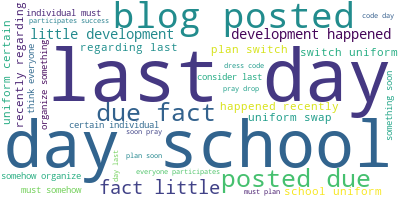

In [86]:
text = list(df.msg_lemmatized.values)
wordcloud = WordCloud(background_color="white", contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [88]:
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

In [104]:
from nltk import ngrams
sentence = 'this is a foo bar sentences and i want to ngramize it'
sent_2=df['msg_lemmatized_without_point'][0]

n = 6
sixgrams = ngrams(sent_2, n)

for grams in sixgrams:
  print (grams)

('This', 'blog', 'posted', 'due', 'fact', 'little')
('blog', 'posted', 'due', 'fact', 'little', 'development')
('posted', 'due', 'fact', 'little', 'development', 'happened')
('due', 'fact', 'little', 'development', 'happened', 'recently')
('fact', 'little', 'development', 'happened', 'recently', 'regarding')
('little', 'development', 'happened', 'recently', 'regarding', 'last')
('development', 'happened', 'recently', 'regarding', 'last', 'day')
('happened', 'recently', 'regarding', 'last', 'day', 'school')
('recently', 'regarding', 'last', 'day', 'school', 'uniform')
('regarding', 'last', 'day', 'school', 'uniform', 'swap')
('last', 'day', 'school', 'uniform', 'swap', 'If')
('day', 'school', 'uniform', 'swap', 'If', 'plan')
('school', 'uniform', 'swap', 'If', 'plan', 'switch')
('uniform', 'swap', 'If', 'plan', 'switch', 'uniform')
('swap', 'If', 'plan', 'switch', 'uniform', 'certain')
('If', 'plan', 'switch', 'uniform', 'certain', 'individual')
('plan', 'switch', 'uniform', 'certain', 

In [108]:
from nltk import ngrams
def get_ngrams(text, n):
    n_grams = ngrams(word_tokenize(text), n)
    return [' '.join(grams) for grams in n_grams]
sent_2=df['text'][0]
get_ngrams(sent_2,6)

['This blog is being posted due',
 'blog is being posted due to',
 'is being posted due to the',
 'being posted due to the fact',
 'posted due to the fact that',
 'due to the fact that little',
 'to the fact that little development',
 'the fact that little development has',
 'fact that little development has happened',
 'that little development has happened recently',
 'little development has happened recently regarding',
 'development has happened recently regarding the',
 'has happened recently regarding the last',
 'happened recently regarding the last day',
 'recently regarding the last day of',
 'regarding the last day of school',
 'the last day of school uniform',
 'last day of school uniform swap',
 'day of school uniform swap .',
 'of school uniform swap . If',
 'school uniform swap . If we',
 'uniform swap . If we all',
 'swap . If we all plan',
 '. If we all plan to',
 'If we all plan to switch',
 'we all plan to switch uniforms',
 'all plan to switch uniforms with',
 'plan t

In [109]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections


import nltk
from nltk.corpus import stopwords
import re


import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [150]:
all_words_nsw = list(itertools.chain(*df['msg_lemmatized_without_point']))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)

[('last', 58500),
 ('day', 58500),
 ('school', 58500),
 ('uniform', 39000),
 ('plan', 39000),
 ('must', 39000),
 ('soon', 39000),
 ('This', 19500),
 ('blog', 19500),
 ('posted', 19500),
 ('due', 19500),
 ('fact', 19500),
 ('little', 19500),
 ('development', 19500),
 ('happened', 19500)]

In [144]:
len(counts_nsw)

35

In [115]:
clean_tweets_no_urls = pd.DataFrame(counts_nsw,
                             columns=['words', 'count'])

clean_tweets_no_urls.head()

,words,count


In [129]:
from ast import literal_eval
def create_word_dict(data, without_stopwords=True, with_stopwords=False):

    if without_stopwords:
        word_dict_without_stopwords = {}
        
    if with_stopwords:
        word_dict_with_stopwords = {}

    stopword_list = stopwords.words('english')
    for i in tqdm(range(len(data))):
        if without_stopwords:
            for word in literal_eval(str(data["word_tokenize_without_stopwords"][i])):
                if word not in [",", ".", ")", "(", "{", "}", "[", "]", ":", ";", "\"\"", "...", "I"] and word not in stopword_list:
                    if word in word_dict_without_stopwords.keys():
                        word_dict_without_stopwords[word] += 1
                    else:
                        word_dict_without_stopwords[word] = 1

        if with_stopwords:
            for word in literal_eval(str(data["word_tokenize"][i])):
                if word not in [",", ".", ")", "(", "{", "}", "[", "]", ":", ";", "\"\"", "...", "I"]:
                    if word in word_dict_with_stopwords.keys():
                        word_dict_with_stopwords[word] += 1
                    else:
                        word_dict_with_stopwords[word] = 1

    if without_stopwords and with_stopwords:
        return word_dict_without_stopwords, word_dict_with_stopwords
    elif without_stopwords:
        return word_dict_without_stopwords
    elif with_stopwords:
        return word_dict_with_stopwords
    else:
        print("Nothing to return selected")
        return 0

In [130]:
words_without_stopwords, words_with_stopwords = create_word_dict(df, True, True)

  0%|          | 0/19500 [00:00<?, ?it/s]

UnboundLocalError: local variable 'fig' referenced before assignment

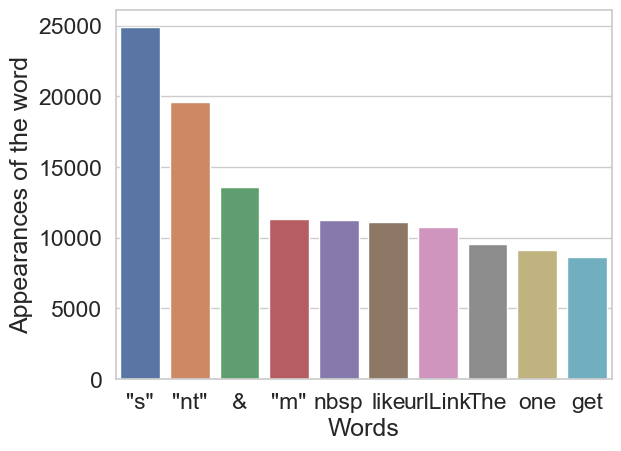

In [133]:
import seaborn as sb
def visualize_specific_words(dictionary, limit=10, save_fig=True, save_name="standard_save_name"):
    data_as_df = pd.DataFrame(data={"word": dictionary.keys(), "number": dictionary.values()})
    sorted_df = data_as_df.sort_values(by="number", ascending=False)

    figure = sb.barplot(data=sorted_df[:limit], x="word", y="number", palette="deep")
    figure.set_xlabel("Words")
    figure.set_ylabel("Appearances of the word")

    if save_fig:
        fig = figure.get_figure()
        fig.savefig(str(save_name + ".jpg"))

    return fig.get_figure()
figure_1 = visualize_specific_words(words_without_stopwords, save_fig=False)

In [134]:
df.msg_lemmatized_without_point.values.tolist()

[['This',
  'blog',
  'posted',
  'due',
  'fact',
  'little',
  'development',
  'happened',
  'recently',
  'regarding',
  'last',
  'day',
  'school',
  'uniform',
  'swap',
  'If',
  'plan',
  'switch',
  'uniform',
  'certain',
  'individual',
  'must',
  'somehow',
  'organize',
  'something',
  'soon',
  'Also',
  'consider',
  'last',
  'day',
  'school',
  'I',
  'think',
  'everyone',
  'participates',
  'success',
  'We',
  'must',
  'plan',
  'soon',
  'pray',
  'drop-the-dress-code-day',
  'last',
  'day',
  'school'],
 ['This',
  'blog',
  'posted',
  'due',
  'fact',
  'little',
  'development',
  'happened',
  'recently',
  'regarding',
  'last',
  'day',
  'school',
  'uniform',
  'swap',
  'If',
  'plan',
  'switch',
  'uniform',
  'certain',
  'individual',
  'must',
  'somehow',
  'organize',
  'something',
  'soon',
  'Also',
  'consider',
  'last',
  'day',
  'school',
  'I',
  'think',
  'everyone',
  'participates',
  'success',
  'We',
  'must',
  'plan',
  'so

In [73]:
liste=[]
for topic in  topics:

    text = list(df[df['topic']==topic].msg_lemmatized_without_point.values)
    flat_list = [item for sublist in text for item in sublist]
    liste.append(flat_list)
liste

[['This',
  'blog',
  'posted',
  'due',
  'fact',
  'little',
  'development',
  'happened',
  'recently',
  'regarding',
  'last',
  'day',
  'school',
  'uniform',
  'swap',
  'If',
  'plan',
  'switch',
  'uniform',
  'certain',
  'individual',
  'must',
  'somehow',
  'organize',
  'something',
  'soon',
  'Also',
  'consider',
  'last',
  'day',
  'school',
  'I',
  'think',
  'everyone',
  'participates',
  'success',
  'We',
  'must',
  'plan',
  'soon',
  'pray',
  'drop-the-dress-code-day',
  'last',
  'day',
  'school',
  'This',
  'blog',
  'posted',
  'due',
  'fact',
  'little',
  'development',
  'happened',
  'recently',
  'regarding',
  'last',
  'day',
  'school',
  'uniform',
  'swap',
  'If',
  'plan',
  'switch',
  'uniform',
  'certain',
  'individual',
  'must',
  'somehow',
  'organize',
  'something',
  'soon',
  'Also',
  'consider',
  'last',
  'day',
  'school',
  'I',
  'think',
  'everyone',
  'participates',
  'success',
  'We',
  'must',
  'plan',
  'soo

In [29]:
import gensim.corpora as corpora

/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/gensim/matutils.py:22: DeprecationWarning: Please use `triu` from the `scipy.linalg` namespace, the `scipy.linalg.special_matrices` namespace is deprecated.
  from scipy.linalg.special_matrices import triu


In [72]:
df['msg_lemmatized_without_point'].values.tolist()

[['This',
  'blog',
  'posted',
  'due',
  'fact',
  'little',
  'development',
  'happened',
  'recently',
  'regarding',
  'last',
  'day',
  'school',
  'uniform',
  'swap',
  'If',
  'plan',
  'switch',
  'uniform',
  'certain',
  'individual',
  'must',
  'somehow',
  'organize',
  'something',
  'soon',
  'Also',
  'consider',
  'last',
  'day',
  'school',
  'I',
  'think',
  'everyone',
  'participates',
  'success',
  'We',
  'must',
  'plan',
  'soon',
  'pray',
  'drop-the-dress-code-day',
  'last',
  'day',
  'school'],
 ['This',
  'blog',
  'posted',
  'due',
  'fact',
  'little',
  'development',
  'happened',
  'recently',
  'regarding',
  'last',
  'day',
  'school',
  'uniform',
  'swap',
  'If',
  'plan',
  'switch',
  'uniform',
  'certain',
  'individual',
  'must',
  'somehow',
  'organize',
  'something',
  'soon',
  'Also',
  'consider',
  'last',
  'day',
  'school',
  'I',
  'think',
  'everyone',
  'participates',
  'success',
  'We',
  'must',
  'plan',
  'so

In [92]:
data_words=df.msg_lemmatized_without_point.values.tolist()

In [93]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 3), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 3), (17, 1), (18, 2), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 3), (27, 1), (28, 1), (29, 2)]


In [94]:
import gensim
from gensim.utils import simple_preprocess

In [99]:
from pprint import pprint
# number of topics
num_topics = 20
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.072*"school" + 0.068*"day" + 0.063*"last" + 0.045*"must" + 0.045*"plan" + '
  '0.043*"soon" + 0.043*"uniform" + 0.025*"everyone" + 0.025*"blog" + '
  '0.024*"organize"'),
 (1,
  '0.071*"day" + 0.066*"school" + 0.063*"last" + 0.046*"uniform" + '
  '0.045*"plan" + 0.042*"soon" + 0.038*"must" + 0.028*"little" + '
  '0.028*"everyone" + 0.026*"individual"'),
 (2,
  '0.058*"school" + 0.052*"day" + 0.048*"must" + 0.047*"plan" + '
  '0.041*"uniform" + 0.039*"last" + 0.036*"soon" + 0.030*"regarding" + '
  '0.029*"everyone" + 0.028*"pray"'),
 (3,
  '0.073*"school" + 0.060*"day" + 0.052*"soon" + 0.049*"last" + '
  '0.042*"uniform" + 0.040*"must" + 0.039*"plan" + 0.027*"certain" + '
  '0.026*"blog" + 0.026*"If"'),
 (4,
  '0.075*"last" + 0.065*"day" + 0.058*"school" + 0.047*"plan" + 0.044*"soon" + '
  '0.043*"uniform" + 0.042*"must" + 0.026*"recently" + 0.025*"due" + '
  '0.025*"swap"'),
 (5,
  '0.069*"day" + 0.063*"last" + 0.056*"school" + 0.049*"uniform" + '
  '0.047*"soon" + 0.045*"pla

In [100]:
import pyLDAvis

voirgehen:
- spacy pipeline machen 
- basierend auf nomen oder so die als grundlage für lda nehmen --> sehen wie verteillungen von den organisationen etc sind 


In [101]:

import pyLDAvis.gensim_models as gensimvis
import pickle 

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/niclascramer/opt/anaconda3/envs/NLP/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
7      0.000120 -0.000427       1        1  7.407210
9      0.000364  0.000756       2        1  7.267465
13     0.000696  0.000350       3        1  7.093442
0     -0.000134  0.000152       4        1  7.076867
4      0.000985 -0.000159       5        1  6.865379
6      0.001479  0.000586       6        1  6.796305
16     0.000068 -0.000506       7        1  6.751674
18    -0.000381 -0.000584       8        1  6.503461
1      0.000590  0.000314       9        1  5.939215
17     0.001827 -0.001763      10        1  5.826112
5      0.000521 -0.000469      11        1  5.792374
10     0.000037 -0.000115      12        1  5.493003
15    -0.000118  0.000266      13        1  5.478334
11    -0.000121  0.000303      14        1  5.344792
8      0.000994  0.000247      15        1  4.616286
19     0.000062 -0.001757      16        1  3.584264
3     -0.001733  0.001649      17        1  1.227990
14    -0.001258  0.000660      18        1  0.593110
12     0.000279  0.001688      19        1  0.234021
2     -0.004277 -0.001190      20        1  0.108696, topic_info=       Term          Freq         Total Category  logprob  loglift
26   school  57122.000000  57122.000000  Default  30.0000  30.0000
8       day  58513.000000  58513.000000  Default  29.0000  29.0000
16     last  57242.000000  57242.000000  Default  28.0000  28.0000
18     must  38997.000000  38997.000000  Default  27.0000  27.0000
21     plan  39770.000000  39770.000000  Default  26.0000  26.0000
..      ...           ...           ...      ...      ...      ...
34  uniform     39.310481  39285.100845  Topic20  -3.1890  -0.0827
26   school     55.340037  57122.316247  Topic20  -2.8470  -0.1151
8       day     49.402471  58513.542218  Topic20  -2.9605  -0.2526
29     soon     34.509304  38827.835614  Topic20  -3.3192  -0.2013
16     last     36.822361  57242.483340  Topic20  -3.2544  -0.5246

[657 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         1  0.079912     Also
0         2  0.069142     Also
0         3  0.080484     Also
0         4  0.077623     Also
0         5  0.069351     Also
...     ...       ...      ...
34       16  0.031895  uniform
34       17  0.011531  uniform
34       18  0.005447  uniform
34       19  0.002495  uniform
34       20  0.000993  uniform

[700 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 10, 14, 1, 5, 7, 17, 19, 2, 18, 6, 11, 16, 12, 9, 20, 4, 15, 13, 3])

In [147]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 782.7/782.7 MB 4.8 MB/s eta 0:00:0000:0100:03
  Preparing metadata (setup.py) ... done
  Created wheel for en_core_web_lg: filename=en_core_web_lg-2.3.1-py3-none-any.whl size=782936104 sha256=91cf7ad53fff25d4018b0a9657ce05237761b48c3bdbd828614b83fdee4caf49
  Stored in directory: /Users/niclascramer/Library/Caches/pip/wheels/8b/bb/bb/bdc918f4b37d930a1be9ed876e7b2c2ee518a34803d78a248e
Successfully built en_core_web_lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
import spacy

nlp_sm = spacy.load("en_core_web_sm")
nlp_lg = spacy.load('en_core_web_lg')

def create_word_counts_by_pos(raw_text, list_of_pos, word_count_dict_input = None):
    """
    takes a raw text file
    tokenizes and lemmatizes it
    limits inspection to list_of_pos types of words
    counts the individual lemmas
    returns a dictionary, keys are pos's in list_of_pos
    values are dictinaries with word counts
    """

    doc = nlp_lg(raw_text)

    if word_count_dict_input is None: 
        word_count_dict = {}
        for part_of_speech in list_of_pos:
            word_count_dict[part_of_speech] = {}
    else:
        word_count_dict = word_count_dict_input

    for token in doc: 
        part_of_speech = token.pos_

        if part_of_speech in list_of_pos and token.is_stop == False:
            word_lemma = token.lemma_
            current_count = word_count_dict[part_of_speech].get(word_lemma, 0)
            current_count += 1
            word_count_dict[part_of_speech][word_lemma] = current_count

    return word_count_dict

def filter_word_count_dict_to_frequent(word_count_dict, threshold):
    """
    Loops through word_count_dict, only keeps items where 
    value is higher than a certain threshold
    """
    frequent_word_count_dict = {}

    list_of_pos = word_count_dict.keys()

    for part_of_speech in list_of_pos:
        frequent_word_count_dict[part_of_speech] = {}
        for key in word_count_dict[part_of_speech]:
            if word_count_dict[part_of_speech][key] > threshold:
                frequent_word_count_dict[part_of_speech][key] = \
                word_count_dict[part_of_speech][key]
                
    return frequent_word_count_dict

def collect_most_frequent_words(word_count_dict, number_to_collect):
    """
    word_count_dict is assumed to be in a format where keys are part-of-speech, 
    values are counts
    number_of_collect: we will collect this amount from each group
    if there is a tie: the one that appeared first
    """

    list_of_pos = word_count_dict.keys()
    most_frequent_words = {}

    for part_of_speech in list_of_pos:
        most_frequent_words[part_of_speech] = \
        sorted(word_count_dict[part_of_speech].items(), \
            key=lambda x: x[1], reverse = True)[:number_to_collect] 
        
    return most_frequent_words

In [148]:
list_of_pos = ['NOUN', 'PROPN', 'ADJ', 'VERB']

In [149]:
df['text'][0]

'This blog is being posted due to the fact that little development has happened recently regarding the last day of school uniform swap. If we all plan to switch uniforms with a certain individual we must somehow organize something soon. Also what do we consider the last day of school I think if everyone participates this will be a success. We must plan this soon and pray that there is not a drop-the-dress-code-day on the last day of school.'

In [ ]:
word_count_dict = \
    word_count_func.create_word_counts_by_pos(text, list_of_pos)